# Classification Models: Pumpkin Seed Varieties

This notebook demonstrates the use of three classification algorithms:
- Decision Tree
- Random Forest
- Support Vector Machine (SVM)

We use PCA to reduce dimensionality for visualization and analyze feature importance using Random Forests.

## Decision Tree Classification

We use a Decision Tree to classify pumpkin seed varieties based on PCA-reduced features. The decision boundary shows how the model separates the classes.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

def plot_decision_boundaries_decision_tree(x, y, class_labels):
    classifier = DecisionTreeClassifier(random_state=10, max_depth=5)
    classifier.fit(x, y)

    fig, ax1 = plt.subplots(1, 1)
    fig.suptitle("Decision Tree")
    colours = ListedColormap(["blue", "green"])
    scatter = ax1.scatter(x[:, 0], x[:, 1], s=5, c=y, cmap=colours)
    ax1.legend(scatter.legend_elements()[0], class_labels)

    x_lim = ax1.get_xlim()
    y_lim = ax1.get_ylim()
    xx, yy = np.meshgrid(np.arange(x_lim[0], x_lim[1], 0.01), np.arange(y_lim[0], y_lim[1], 0.01))
    z = classifier.predict(np.column_stack((xx.ravel(), yy.ravel()))).reshape(xx.shape)
    ax1.contourf(xx, yy, z, alpha=0.3, cmap=colours)
    plt.show()

## Random Forest Classification

Random Forests combine multiple decision trees for better generalization. We visualize the decision boundary after PCA.

In [6]:
from sklearn.ensemble import RandomForestClassifier

def plot_decision_boundaries_random_forest(x, y, class_labels):
    forest = RandomForestClassifier(n_estimators=150, random_state=10)
    forest.fit(x, y)

    fig, ax1 = plt.subplots(1, 1)
    fig.suptitle("Random Forest Decision Tree")
    colours = ListedColormap(["blue", "green"])
    scatter = ax1.scatter(x[:, 0], x[:, 1], s=5, c=y, cmap=colours)
    ax1.legend(scatter.legend_elements()[0], class_labels)

    x_lim = ax1.get_xlim()
    y_lim = ax1.get_ylim()
    xx, yy = np.meshgrid(np.arange(x_lim[0], x_lim[1], 0.01), np.arange(y_lim[0], y_lim[1], 0.01))
    z = forest.predict(np.column_stack((xx.ravel(), yy.ravel()))).reshape(xx.shape)
    ax1.contourf(xx, yy, z, alpha=0.3, cmap=colours)
    plt.show()

## Support Vector Machine (SVM) Classification

SVMs find optimal boundaries between classes. We visualize the decision surface after PCA transformation.

In [7]:
from sklearn.svm import SVC

def plot_decision_boundaries_support_vector_machine(x, y, class_labels):
    svm = SVC()
    svm.fit(x, y)

    fig, ax1 = plt.subplots(1, 1)
    fig.suptitle("SVM Decision Tree")
    colours = ListedColormap(["blue", "green"])
    scatter = ax1.scatter(x[:, 0], x[:, 1], s=5, c=y, cmap=colours)
    ax1.legend(scatter.legend_elements()[0], class_labels)

    x_lim = ax1.get_xlim()
    y_lim = ax1.get_ylim()
    xx, yy = np.meshgrid(np.arange(x_lim[0], x_lim[1], 0.01), np.arange(y_lim[0], y_lim[1], 0.01))
    z = svm.predict(np.column_stack((xx.ravel(), yy.ravel()))).reshape(xx.shape)
    ax1.contourf(xx, yy, z, alpha=0.3, cmap=colours)
    plt.show()

## PCA Transformation and Execution

We apply PCA to reduce the feature space to 2D and run all three classifiers.

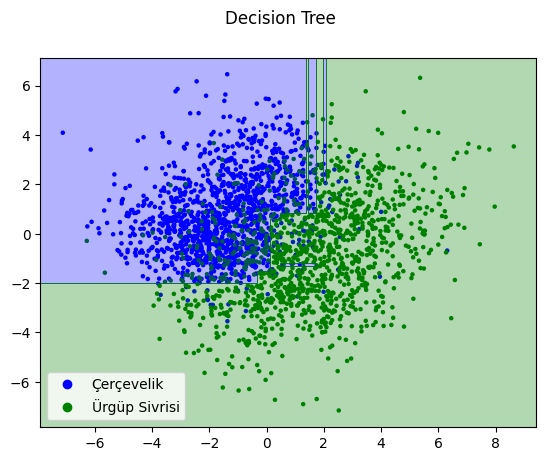

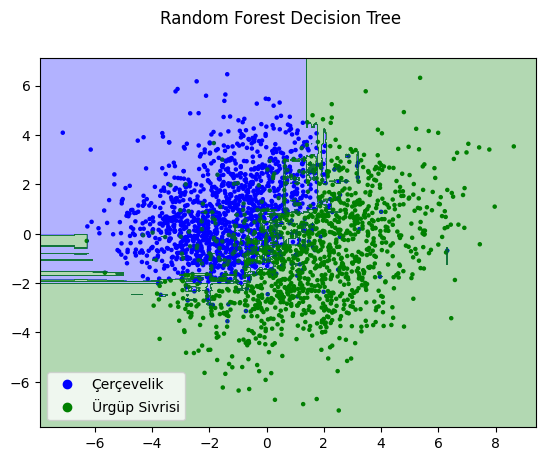

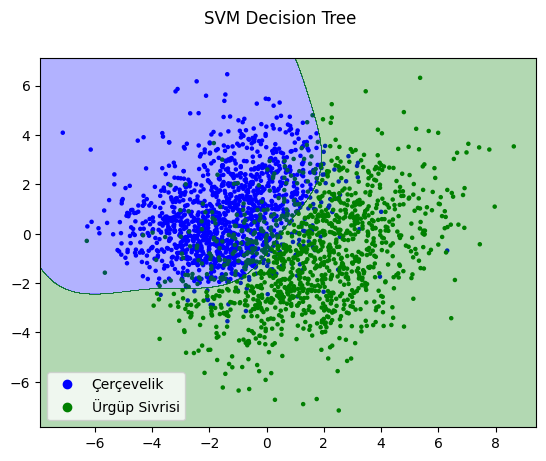

In [10]:
df = pd.read_csv("Pumpkin_Seeds_Dataset.csv")
y, class_labels = pd.factorize(df["Class"])
x = df.drop(["Class"], axis=1)
x = (x - x.mean()) / x.std()
x = x.to_numpy()

pca = PCA(random_state=10, n_components=2)
x_reduced = pca.fit_transform(x)

plot_decision_boundaries_decision_tree(x_reduced, y, class_labels)
plot_decision_boundaries_random_forest(x_reduced, y, class_labels)
plot_decision_boundaries_support_vector_machine(x_reduced, y, class_labels)

## Feature Importance Analysis

We use Random Forests to rank features by importance for classifying date fruit varieties.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

def rf_feature_importance(x, y, feature_names):
    forest = RandomForestClassifier(n_estimators=100)
    forest.fit(x, y)

    importances = forest.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(8, 6))
    plt.title("Feature Importances (Random Forest)")
    plt.bar(range(len(importances)), importances[indices], align="center")
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices])
    plt.ylabel("Importance Score")
    plt.tight_layout()
    plt.show()

data = pd.read_csv("data/Normalized_Date_Fruit_Datasets.csv")
y = data["Class"]
feature_names = ["PERIMETER", "AREA", "COMPACTNESS", "ECCENTRICITY"]
x = data[feature_names].to_numpy()

rf_feature_importance(x, y, feature_names)